In [431]:
import glob,os
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pickle
import pandas as pd

shawdir = 'c:/users/marianne/downloads/shaw302/'
ifdir =shawdir + 'output/'
os.chdir(shawdir)

In [434]:
## run this in powershell before you do anything!!
## os.chdir('output/noveg')
## !(Get-Content out.csv).replace('0\-', '0\ \-') | Set-Content out.csv)
##os.chdir('..')

## or cygwin
sed 's/0\-/0\ \-/g' out.csv > out2.csv
mv out2.csv out.csv
sed 's/0\-/0\ \-/g' water.csv > water2.csv
mv water2.csv water.csv
sed 's/0\-/0\ \-/g' energy.csv > out2.csv
mv out2.csv energy.csv
sed 's/0\-/0\ \-/g' frost.csv > water2.csv
mv water2.csv frost.csv
sed 's/0\-/0\ \-/g' moist.csv > out2.csv
mv out2.csv moist.csv
sed 's/0\-/0\ \-/g' snowtmp.csv > water2.csv
mv water2.csv snowtmp.csv
sed 's/0\-/0\ \-/g' temp.csv > out2.csv
mv out2.csv temp.csv

In [562]:
## function takes the water output file and saves it as a dictionary called ofname
def prep_process(ifname, ofname):
    DAY = []
    HR = []
    YR = []
    PRECIP = []
    DT = []
    SNOWMELT= []
    INTRCP =[]
    ET =[]
    TRANSP = []
    CANOPY =[]
    SNOW =[]
    RESIDUE = []
    SOIL =[] 
    PERC =[]
    RUNOFF =[]
    PONDED =[]
    C_ET =[]
    ERROR =[]
    water = pd.read_csv(ifname,skiprows=4)
    for i in range(4,len(water)):
        data = water.loc[water.index==i].values
        tmp = (data[0][0].split(' '))
        tmp2=[]
        for d in tmp:
            if d!='':
                tmp2.append(d)
        tmp2 = [float(d) for d in tmp2]
        DAY.append(int(tmp2[0]))
        HR.append(int(tmp2[1]))
        YR.append(int(tmp2[2])) # = [] # 
        PRECIP.append(tmp2[3]) # = []
        SNOWMELT.append(tmp2[4]) #= []
        INTRCP.append(tmp2[5]) #  =[]
        ET.append(tmp2[6]) # =[]
        TRANSP.append(tmp2[7]) #.append(tmp2[1])# #= []
        CANOPY.append(tmp2[8]) # =[]
        SNOW.append(tmp2[9]) # =[]
        RESIDUE.append(tmp2[10])#  = []
        SOIL.append(tmp2[11]) #=[] 
        PERC.append(tmp2[12]) # =[]
        RUNOFF.append(tmp2[13])# =[]
        PONDED.append(tmp2[14])  # =[]
        C_ET.append(tmp2[15])  #  =[]
        ERROR.append(tmp2[16])  # =[]
    for i in range(len(HR)):
        val = str(int(DAY[i]))
        tmp = datetime.datetime.strptime(val,'%j')
        m = tmp.month
        d = tmp.day
        tmp = datetime.datetime(day = d,month= m,year = 1900+int(YR[i]),hour = int(HR[i])-1)
        DT.append(tmp)
    to_save = {'DT':DT,
        'DAY':DAY,
        'HR':HR,
        'YR':YR,
        'PRECIP':PRECIP,
        'SNOWMELT':SNOWMELT,
        'INTRCP':INTRCP,
        'ET':ET,
        'TRANSP':TRANSP,
        'CANOPY':CANOPY,
        'SNOW':SNOW,
        'RESIDUE':RESIDUE,
        'SOIL':SOIL,
        'PERC':PERC,
        'RUNOFF':RUNOFF,
        'PONDED':PONDED,
        'C_ET':C_ET,
        'ERROR':ERROR
        }

    with open(ofname + 'proc.pkl', 'wb') as file:
            pickle.dump(to_save, file)

def prep_output(ifname, ofname):
    file = open(ifname, 'r')
    lines = file.readlines()
    snowkey = 'SNOW LAYERS'
    reskey = 'RESIDUE LAYERS'
    tmp = [snowkey in lines[i] for i in range(len(lines))]
    snow_locs = pd.DataFrame(data = range(len(lines))).loc[tmp][0].values
    tmp = [reskey in lines[i] for i in range(len(lines))]
    res_locs = pd.DataFrame(data = range(len(lines))).loc[tmp][0].values
    res_locs = res_locs[2:]
    DAY = []
    HR = []
    YR = []
    DT = []
    DEPTH= []
    TEMP =[]
    LIQUID =[]
    DENSITY = []
    for i in range(len(snow_locs)):
        start = snow_locs[i]
        end = res_locs[i]
        data = lines[start:end]
        layers = len(data)-3
        depths = []
        temps = []
        liquids = []
        densitys = []
        for j in range(3,3+layers):
            tmp = data[j].split(' ')
            tmp2=[]
            for d in tmp:
                if d!='': tmp2.append(float(d.split(',')[0]))
            depths.append(tmp2[3])
            if j<layers+2:
                temps.append(tmp2[4])
                liquids.append(tmp2[5])
                densitys.append(tmp2[6])        

        DAY.append(int(tmp2[0]))
        HR.append(int(tmp2[1]))
        YR.append(int(tmp2[2]))
        DEPTH.append(depths)
        TEMP.append(temps)
        LIQUID.append(liquids)
        DENSITY.append(densitys)

    for i in range(len(HR)):
        val = str(int(DAY[i]))
        tmp = datetime.datetime.strptime(val,'%j')
        m = tmp.month
        d = tmp.day
        tmp = datetime.datetime(day = d,month= m,year = 1900+int(YR[i]),hour = int(HR[i])-1)
        DT.append(tmp)
    to_save = {'DT':DT,
        'DAY':DAY,
        'HR':HR,
        'YR':YR,
        'DEPTH':DEPTH,
        'TEMP':TEMP,
        'LIQUID':LIQUID,
        'DENSITY':DENSITY,
        }
    with open(ofname + 'out.pkl', 'wb') as file:
        pickle.dump(to_save, file)



## plots comparisons
def plot_compare(names,procvars,outvars,figname):
    kproc = len(procvars)
    kout = len(outvars)
    ktot = kproc + kout
    fig,axs=plt.subplots(ktot,figsize = (10,5*ktot))
    axf = axs.flatten()

    ## process vars
    for n in names:
        with open(n + 'proc.pkl', 'rb') as file:
            data = pickle.load(file)
        for i in range(kproc):
            axf[i].plot(data['DT'],data[procvars[i]],label = n)
            axf[i].set_ylabel(procvars[i])
            axf[i].legend()
    ## output vars  
        with open(n + 'out.pkl', 'rb') as file:
            data = pickle.load(file)
        for i in range(len(outvars)):
            timedata = data['DT']
            ydata = data[outvars[i]]
            y=[]
            for k in range(len(ydata)):
                y.append(ydata[k][-1])
            axf[i+kproc].plot(timedata,y,label = n)
            axf[i+kproc].set_ylabel(outvars[i])
            axf[i+kproc].legend()
    
    plt.show()
    fig.savefig(shawdir + 'figures/'+figname+'.png')

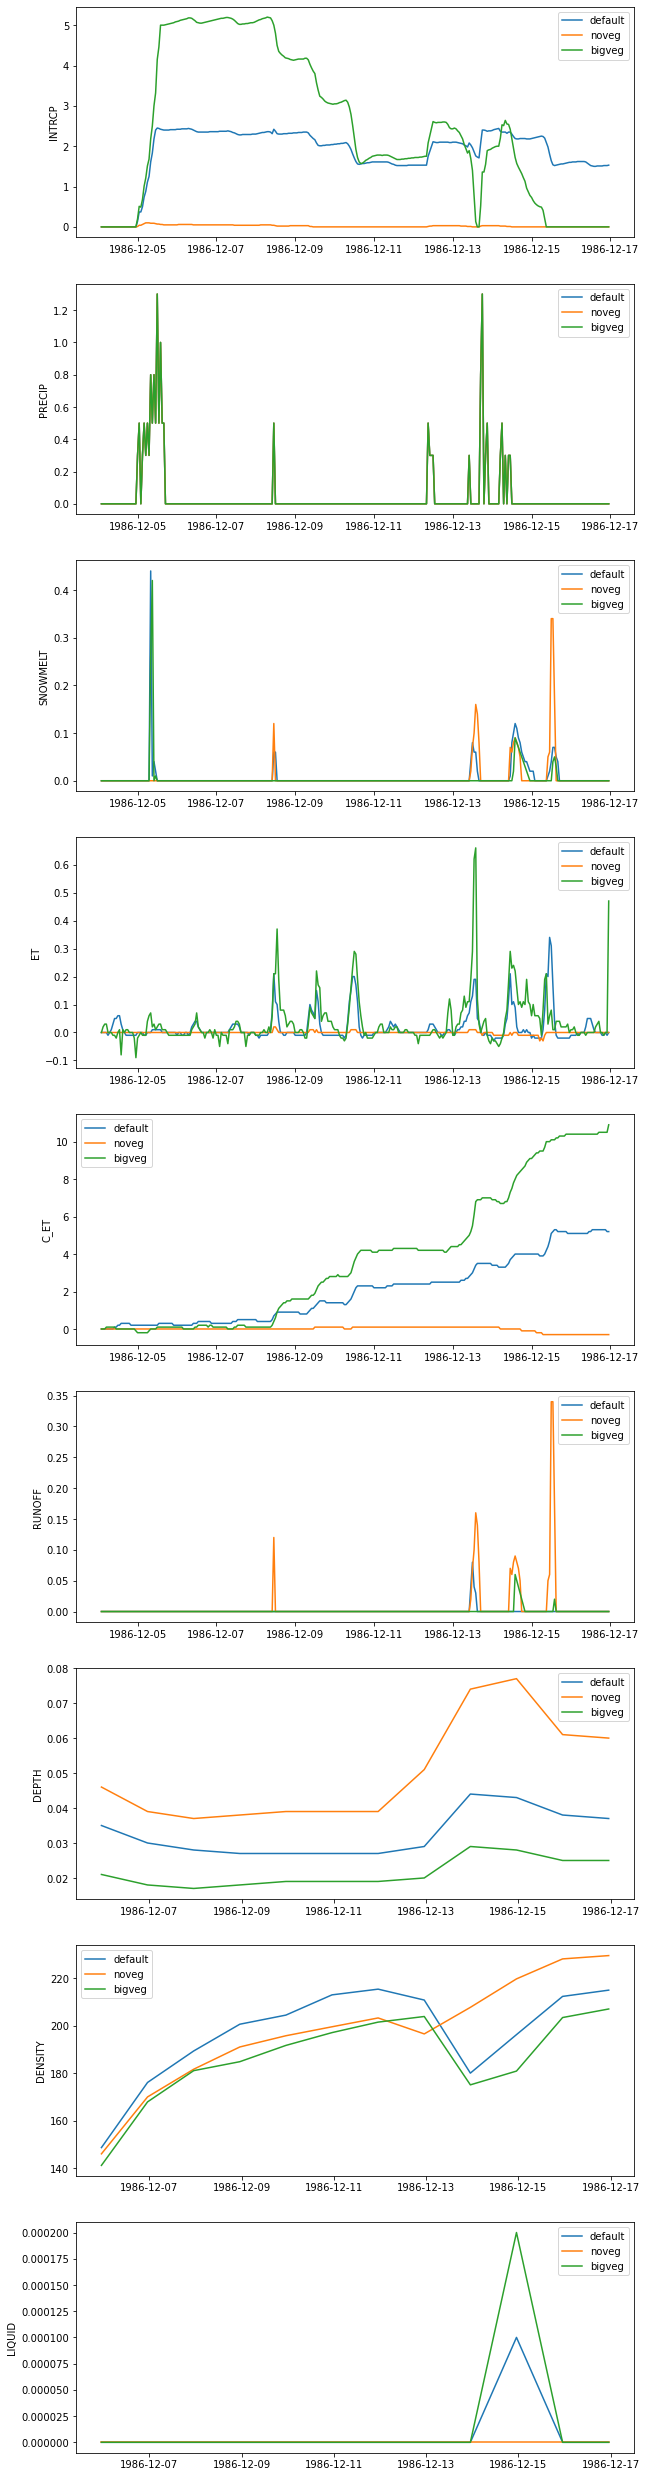

In [564]:
fnames = ['default','noveg','bigveg']
# fnames = ['default']
## variable options:
# PRECIP
# SNOWMELT 
# INTRCP   
# ET    
# TRANSP 
# CANOPY  
# SNOW 
# RESIDUE
# SOIL  
# PERC 
# RUNOFF 
# PONDED    
# C_ET    
# ERROR
procvars = ['INTRCP','PRECIP','SNOWMELT','ET','C_ET','RUNOFF']
outvars = ['DEPTH','DENSITY','LIQUID']
##### run
for i in range(len(fnames)):
    ifname1 = ifdir +'/' + fnames[i] +'/water.csv'
    ifname2 = ifdir + '/' + fnames[i] + '/out.csv'
    ofname = fnames[i]
    prep_process(ifname = ifname1, ofname = ofname)
    prep_output(ifname = ifname2, ofname = ofname)

plot_compare(names=fnames,procvars=procvars,outvars = outvars,figname = 'proc_out')